# Project 2 - Supervised Learning
## Bank Client Attributes and Marketing Outcomes
### Context
For this project, we were given a dataset consisting of information about a bank and its clients. The data includes details about a marketing campaign and its outcomes. 
Our goal for this project is to apply machine learning techniques and algorithms to analyse the data and obtain conclusions regarding the campaign, as well as provide predictions about future campaigns.
### Dataset Information
This dataset includes information about a Portuguese bank and its clients, namely regarding the results of a marketing campaign, that lasted from 2008 to 2010, where clients were contacted by phone.
The dataset contains 45211 entries and 18 columns. The data is labelled, allowing for the application of supervised algorithms. 
Of the 18 columns, X are numerical and Y are categorical.
#### Numerical categories
- **Age**: Age of client
- **Balance**: Balance in the client's account.
- **Day**: Day of the month in which the contacts were made
- **Duration**: Duration of the contact (seconds)
- **Campaign**: How many times the client was contacted
- **Pdays**: How many days ago was the last campaign made
- **Previous**: How many times was the client previously contacted
#### Categorical categories
- **Job**: Client's job
- **Marital**: Client's marital status
- **Education**: How educated the client is
- **Default**: If the client is in default - Failure to make payments in a debt
- **Housing**: If the client has any housing loan
- **Loan**: If the client has any personal loan
- **Contact**: How the contact was made
- **Month**: Month in which the contact was made
- **Poutcome**: Outcome of previous marketing campaign
- **Y**: If the campaign was successful or not
### Dataset Pre-processing
Before running any algorithms, we analysed the given data.
We started by importing all of the necessary libraries.

In [1]:
import warnings
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings('ignore')

Then, we loaded our dataset to pandas, created the dataframe `data` and started to analyze the different columns and values.

In [2]:
data = pd.read_csv('data/Assignment-2_Data.csv')
data.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


To start our data processing, we started by looking at the values in the different columns, to gain a better understanding of which actions we would need to take.
For example, we noticed right away that:
1. Age: There were negative numbers (-1), which doesn't make sense regarding the context.
2. Pdays: There were also negative values, but in this case it makes sense regarding the context - interpreted as "No previous campaign".

In [4]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Next, we needed to understand which columns had null instances and, in those cases, what to do with them. Because we had a big dataset (45k instances), we decided to simply ignore (drop) every line with null values.

In [5]:
print("Null values in the dataset:")
print(data.isnull().sum())

Null values in the dataset:
Id            0
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64


In [6]:
data.dropna(inplace=True)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 45197 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45197 non-null  int64  
 1   age        45197 non-null  float64
 2   job        45197 non-null  object 
 3   marital    45197 non-null  object 
 4   education  45197 non-null  object 
 5   default    45197 non-null  object 
 6   balance    45197 non-null  float64
 7   housing    45197 non-null  object 
 8   loan       45197 non-null  object 
 9   contact    45197 non-null  object 
 10  day        45197 non-null  int64  
 11  month      45197 non-null  object 
 12  duration   45197 non-null  int64  
 13  campaign   45197 non-null  int64  
 14  pdays      45197 non-null  int64  
 15  previous   45197 non-null  int64  
 16  poutcome   45197 non-null  object 
 17  y          45197 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


,Id,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000
mean,23612.991415,40.933204,1362.608027,15.809766,258.147974,2.764387,40.210589,0.580503
std,13047.409252,10.623076,3045.162034,8.321591,257.444942,3.098345,100.141627,2.303775
min,1004.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12314.000000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23613.000000,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34912.000000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Now, we can see that, in the numerical categories, there are no null values and we have a total of 45197 instances.

We then decided to take a look at the categorical features. 
Firstly, our goal was to discover whether any feature had just a single value. If that were the case, that featur could simply be ignored, as it wouldn't have any impact on the final label.

In [7]:
categories = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
print("Is there any categorical column with just one value? ")
flag = False
for category in categories:
    if (data[category].nunique() == 1):
        flag = True
        print(f'Yes, {category} has just one value')
if not flag:
    print('No')    

Is there any categorical column with just one value? 
No


As you can see, every categorical feature has multiple values and, consequently, impacts the categorization.

Next, we needed to understand if there were any duplicate rows:

In [8]:
print("There are", data.duplicated().sum(), "duplicate rows in the dataset")

There are 0 duplicate rows in the dataset


#### Outlier Analysis
Now we were ready to look at any outliers in the data. We started by plotting boxplots for every numerical feature.

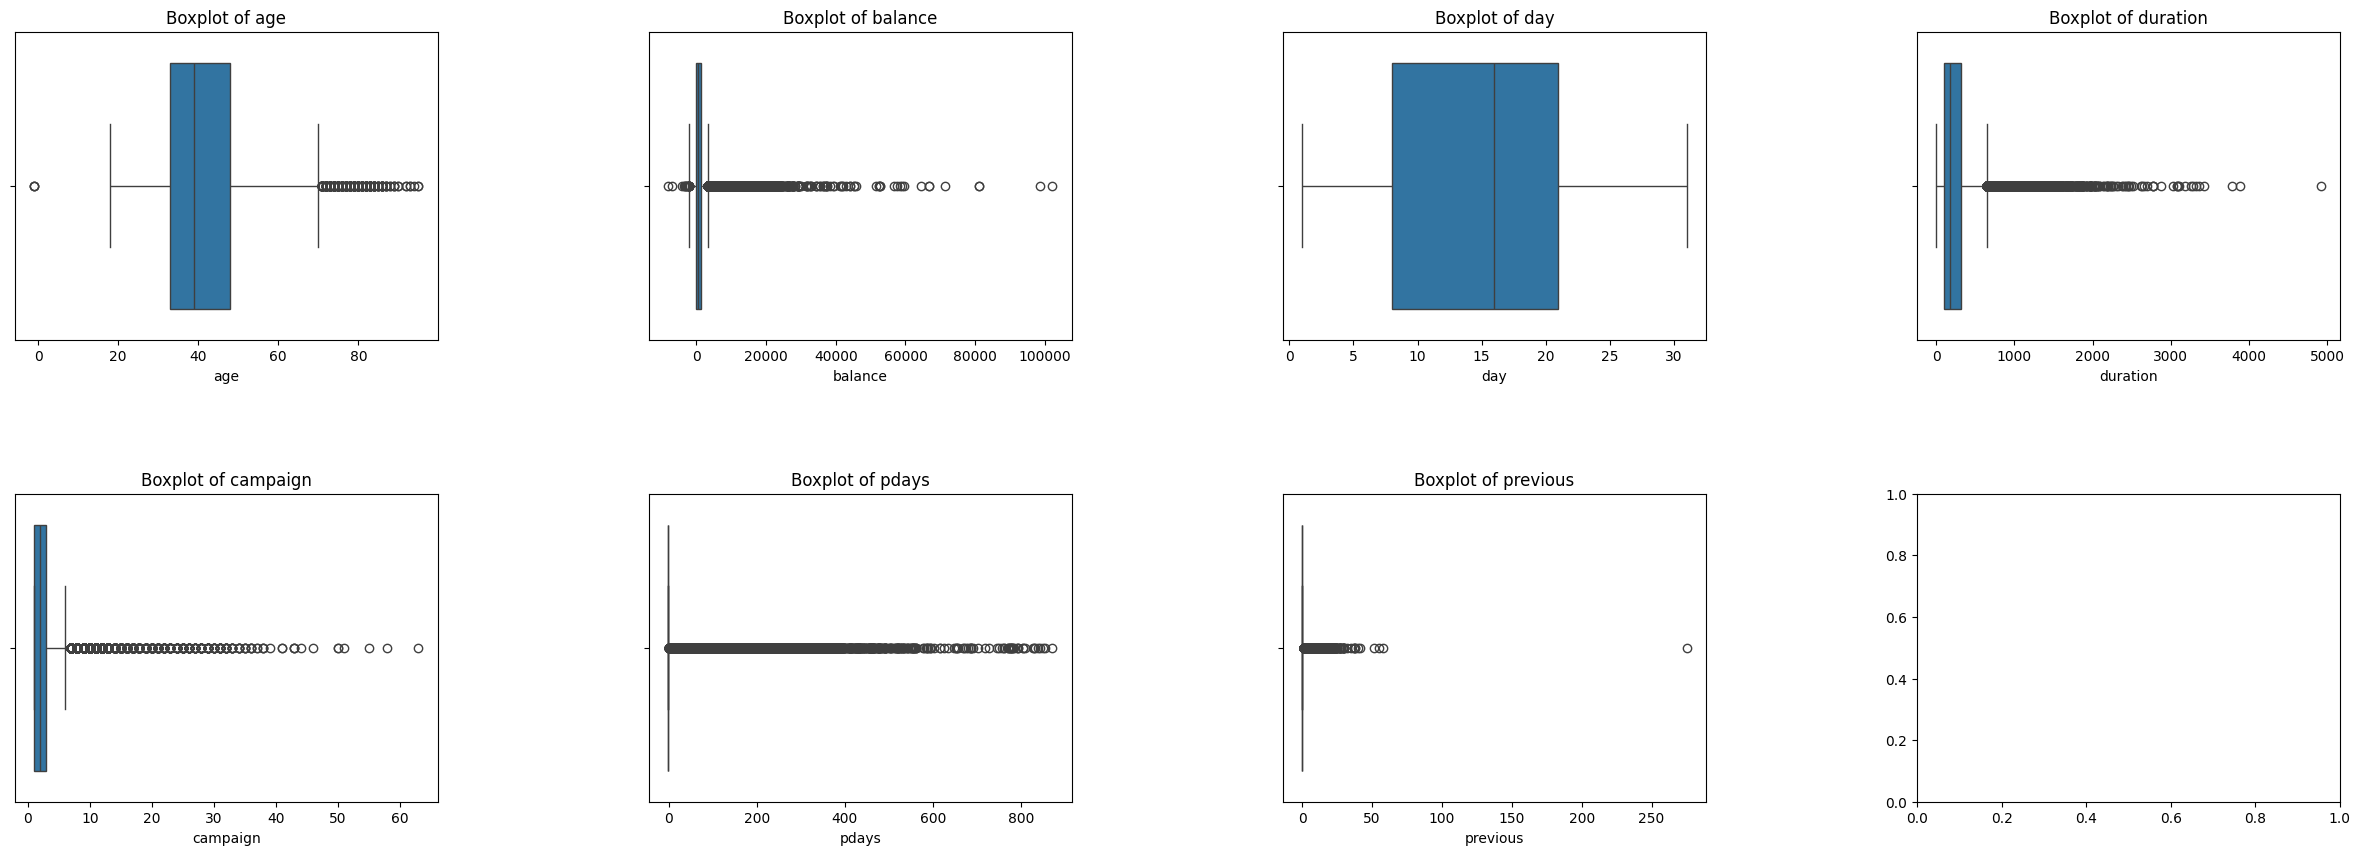

In [9]:
numerical_categories = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for i, category in enumerate(numerical_categories):
    row = i // 4
    col = i % 4
    sb.boxplot(x=category, data=data, ax=ax[row][col])
    ax[row][col].set_title(f'Boxplot of {category}')

Conclusions regarding the presence of outliers:
- Age <= 0
- Previous: ~280

We then removed the outliers by:
1. Age: filtering by >= 18 years-old (since the dataset refers to the results of a marketing campaign, everyone that intervened needed to have a bank account. We considered that minors cannot have their own bank accounts and so, we filtered them out). This removed the previously noted negative (-1) values.
2. Previous: filtering by <= 150 to remove outlier

In [10]:
data = data[data['age']>=18] ## filtrar por maiores de 18
data = data[data['previous']<=150] ## filtrar por menos de 150

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45193 non-null  int64  
 1   age        45193 non-null  float64
 2   job        45193 non-null  object 
 3   marital    45193 non-null  object 
 4   education  45193 non-null  object 
 5   default    45193 non-null  object 
 6   balance    45193 non-null  float64
 7   housing    45193 non-null  object 
 8   loan       45193 non-null  object 
 9   contact    45193 non-null  object 
 10  day        45193 non-null  int64  
 11  month      45193 non-null  object 
 12  duration   45193 non-null  int64  
 13  campaign   45193 non-null  int64  
 14  pdays      45193 non-null  int64  
 15  previous   45193 non-null  int64  
 16  poutcome   45193 non-null  object 
 17  y          45193 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


,Id,age,balance,day,duration,campaign,pdays,previous
count,45193.000000,45193.000000,45193.000000,45193.000000,45193.000000,45193.000000,45193.000000,45193.000000
mean,23611.346337,40.936008,1362.639878,15.809993,258.142035,2.764499,40.207510,0.574292
std,13046.651525,10.618050,3045.277973,8.321700,257.455200,3.098456,100.140249,1.907936
min,1004.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12313.000000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23611.000000,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34910.000000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,58.000000


We can now see that all of the numeric variables have reasonable ranges and values.

We moved on to the categorical features. To look for outliers we decided to create countplots for each categorical feature, that show how many times each value appeared. This served to analyse:
1) the range of object values per feature. We understood if they were binary features or not
2) the existence of any typos that resulted in the same value being accounted for twice. For example "blue-collar" and "blue-colar". In our case, there were none.

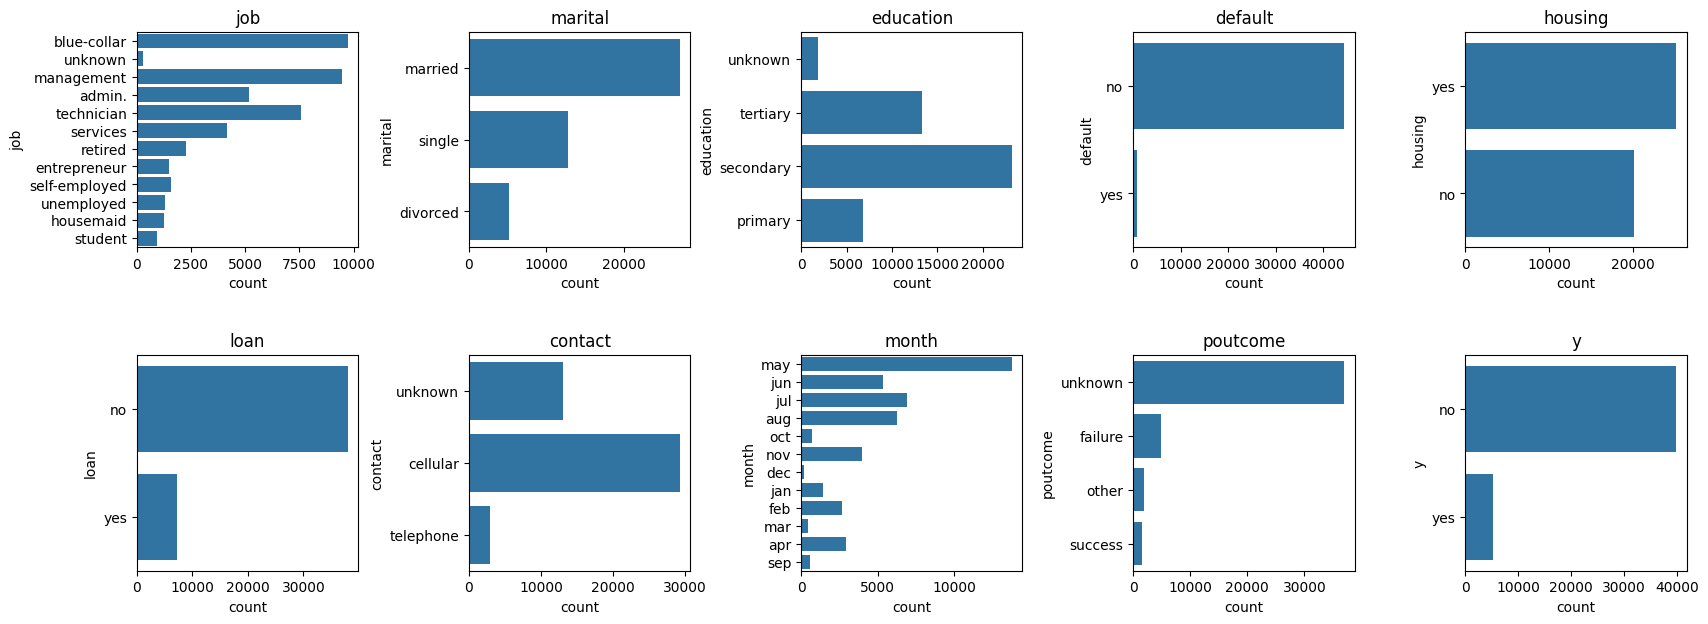

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(20,7))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

for i, category in enumerate(categories):
    row = i // 5
    col = i % 5
    sb.countplot(data[category], ax=ax[row][col])
    ax[row][col].set_title(category)

Our conclusions:
1. Binary features: `default`, `housing`, `loan`, `y`.
2. No typos

Finally, we saved our, now clean, data in a new file.

In [12]:
path_cleaned = 'data/Assignment-2_Data-Clean.csv'
data.to_csv(path_cleaned, index=False) 

-------------------------------------------------------------------------------------------------------------------------------

### Dataset analysis
Now that we cleaned some misguiding values from our dataset, we can start to really analyse them.

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def plot_confusion_matrix(actual, predicted, figsize=(5, 5), color='red'):
    fig, ax = plt.subplots(figsize=figsize)
    cm = confusion_matrix(actual, predicted)
    ax.imshow(cm)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color=color)
            
    plt.show()

#### Encoding
We droped our `id` column, as it wouldn't be useful for any of the algorithms. We also defined the `y` feature as our label.

We started by encoding our categorical values into numerical.
For the month feature, each month was transformed to its numerical representation (january - 1, february - 2, ...)
Binary and categorical features were hot encoded (using label enconding in the case of binary features).

This meant that for each unique category in the categorical variable, a new binary (dummy) variable is created and set to 1 or 0 if the category is present or not. This is especially important so that our ML algorithms don't mistakenly assume that the categories have an order or numerical relationship and instead uses these categories as distinct, separate features.

In [14]:
import numpy as np

col_names = [ 'age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome', 'y']
data_clean = pd.read_csv('data/Assignment-2_Data-Clean.csv', names=col_names, header=0)

# Types of columns
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
binary_columns = ['default', 'housing', 'loan']
unchanged_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

inputs = data_clean[['age', 'job', 'marital', 'education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']]
labels = data_clean.y

# Define a dictionary to map month names to numbers
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month names with numbers
inputs['month'] = inputs['month'].replace(month_mapping)

# Label encode the binary columns
inputs_encoded = pd.get_dummies(inputs, columns=binary_columns, drop_first=True, dtype=np.int64)

# One hot encode the categorical columns
inputs_encoded = pd.get_dummies(inputs_encoded, columns=categorical_columns, dtype=np.int64)

#### Scaling
After that, we procedeed to scale the data. This is important in order to normalize the range of variables, making the training process more efficient, and preventing certain features from dominating others due to their scale.
In this case, we used MinMaxScaler, that scales data so that all features are in the range [0,1].

In [15]:
# Scale the data (Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Save the encoded inputs before scaling to use them later to compare
inputs_encoded_before_scaling = inputs_encoded.copy()

inputs_encoded_scaled = scaler.fit_transform(inputs_encoded)

#### Correlation analysis
Now, it's time to understand if there is any correlation between different features in our dataset. We plotted our correlation matrix which resulted in relatively low values of correlation.

This meant that no two features carry too similar information and all of the categories are useful for model training.

The highest correlation was 0.7 between `pdays` and `poutcome_failure` which didn't allow for significant conclusions.

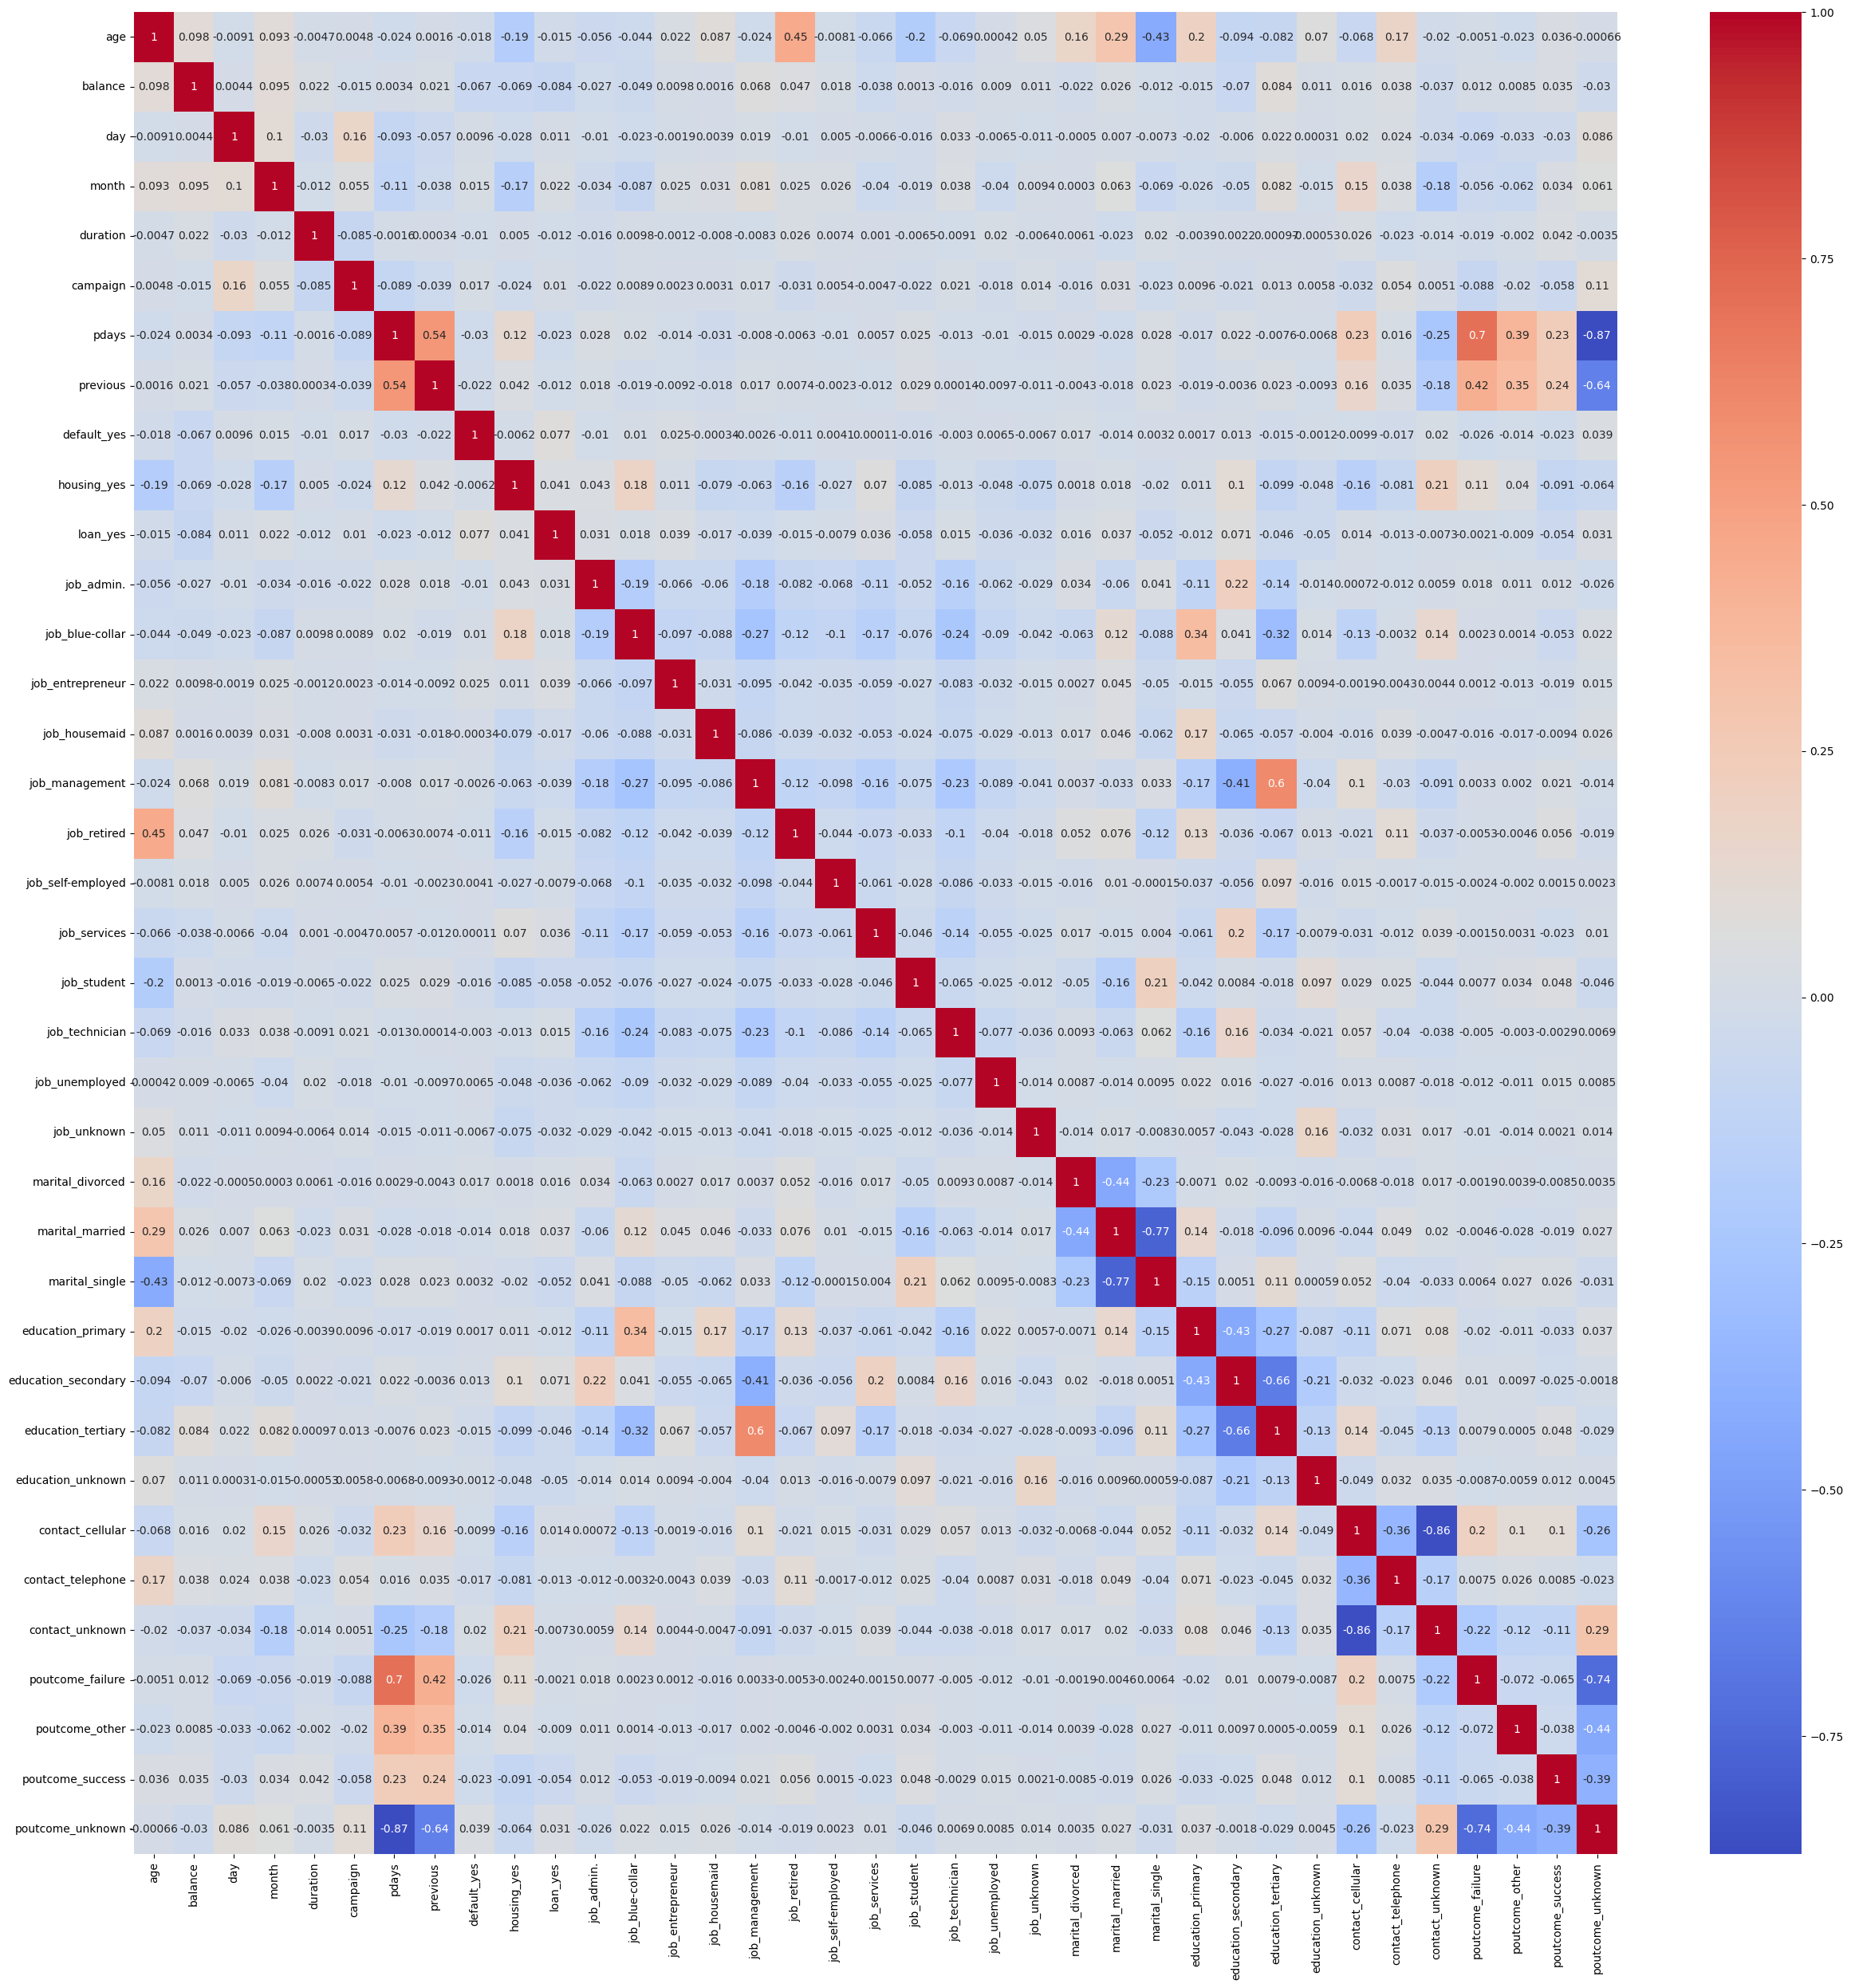

In [16]:
# Correlation Matrix
correlation_matrix = inputs_encoded.corr()
plt.figure(figsize=(30, 30))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#### Data Splitting
Now, we split the data into our training and testing sets. due to the dimension of our dataset (45k instances) we decided to split it 80/20 for training/testing.

In [17]:
# Splitting the data

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(inputs_encoded_scaled, labels, test_size=0.20, random_state=42)

# Convert to DataFrame
training_inputs = pd.DataFrame(training_inputs, columns=inputs_encoded.columns)
testing_inputs = pd.DataFrame(testing_inputs, columns=inputs_encoded.columns)

# Save the data before sampling to use them later to compare
(training_inputs_before_sampling, testing_inputs_before_sampling, training_classes_before_sampling, testing_classes_before_sampling) = (
    training_inputs.copy(), testing_inputs.copy(), training_classes.copy(), testing_classes.copy()
)

#### Data sampling
Before proceding to the application of the algorithms, we needed to understand the distribution of our label. 

We showed that the distribution of the label is unbalanced, with a majority of the instances being negative. This is important to understand, as it can impact the performance of our algorithms. In this case, we decided to then apply SMOTE to balance the dataset. 

SMOTE is a technique that generates synthetic samples from the minority class, which can be used to balance the class distribution. This is important because most machine learning algorithms work best when the number of instances of each class are roughly equal.

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler, SMOTENC

# Check the label's distribution
print('Before resampling:')
print(training_classes.value_counts())

# Different resampling techniques
encoded_columns = inputs_encoded.columns[inputs_encoded.columns.str.startswith(tuple(categorical_columns + binary_columns))]

categorical_features_mask = [column in encoded_columns for column in inputs_encoded.columns]

sm = SMOTENC(sampling_strategy='minority', random_state=42, categorical_features=categorical_features_mask)
# sm = RandomOverSampler(sampling_strategy='minority', random_state=42)
# sm = RandomUnderSampler(sampling_strategy='majority', random_state=42)

training_inputs, training_classes = sm.fit_resample(training_inputs, training_classes)

# Check the label's distribution
print('After resampling:')
print(training_classes.value_counts())

Before resampling:
y
no     31923
yes     4231
Name: count, dtype: int64
After resampling:
y
no     31923
yes    31923
Name: count, dtype: int64


### Model Training
#### Logistic Regression
We started by applying a Logistic Regression model to our data. This is a simple model that is often used as a baseline for classification problems. It works by predicting the probability that a given instance belongs to a particular class using a logistic (sigmoid) function.

We trained the model and obtained the following results:

Training accuracy:  0.8698743852394825
              precision    recall  f1-score   support

          no       0.95      0.89      0.92      7984
         yes       0.45      0.68      0.54      1055

    accuracy                           0.86      9039
   macro avg       0.70      0.78      0.73      9039
weighted avg       0.89      0.86      0.88      9039



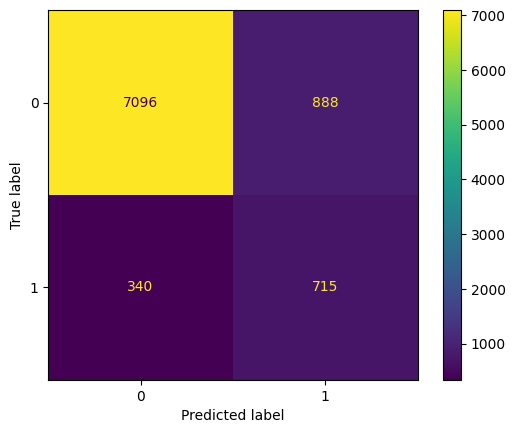

In [19]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression(solver='liblinear', class_weight="balanced", random_state=42, penalty='l1', C=40)

logisticRegression.fit(training_inputs, training_classes)

print("Training accuracy: ", logisticRegression.score(training_inputs, training_classes))
print(classification_report(testing_classes, logisticRegression.predict(testing_inputs)))

t1 = ConfusionMatrixDisplay(confusion_matrix(testing_classes, logisticRegression.predict(testing_inputs)))
t1.plot()

##### Hyperparameter tuning for Logistic Regression

We then procedeed to apply hyperparameter tuning to our model. This is important to optimize the performance of our model. We used GridSearchCV to search for the best hyperparameters for our model.

For Logistic Regression, we tuned the following hyperparameters:
- C: Inverse of regularization strength. Smaller values specify stronger regularization.
- solver: Algorithm to use in the optimization problem. We initially tested 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'. We found that 'liblinear' was the best solver for our model.
- penalty: Regularization term. We tested 'l1' and 'l2' penalties. We found that 'l1' was the best penalty for our model.

However, in the following code, we will only show the best hyperparameters found given that we used a coarse-to-fine approach to find the best hyperparameters, initially testing a wide range of values and then narrowing down the search to the best values.

In [94]:
# Optmizing the Logistic Regression model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

solver=['liblinear']
penalty = ['l1']
C = [20, 35, 40, 45]

scoring = {
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes'),
}

param_grid = dict(solver=solver, penalty=penalty, C=C)

grid = GridSearchCV(estimator=LogisticRegression(random_state=42, class_weight="balanced"), cv=5, param_grid=param_grid, n_jobs=-1, verbose = 3, scoring=scoring, refit='f1')
grid_result = grid.fit(training_inputs, training_classes)

print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best: 0.5220230448337069 using {'C': 45, 'penalty': 'l1', 'solver': 'liblinear'}


#### Decision Tree
We then applied a Decision Tree model to our data. This is a simple model that works by recursively splitting the data into subsets based on the feature that results in the most information gain. It is a powerful model that can capture complex relationships in the data.

              precision    recall  f1-score   support

          no       0.94      0.90      0.92      7984
         yes       0.43      0.60      0.51      1055

    accuracy                           0.86      9039
   macro avg       0.69      0.75      0.71      9039
weighted avg       0.89      0.86      0.87      9039



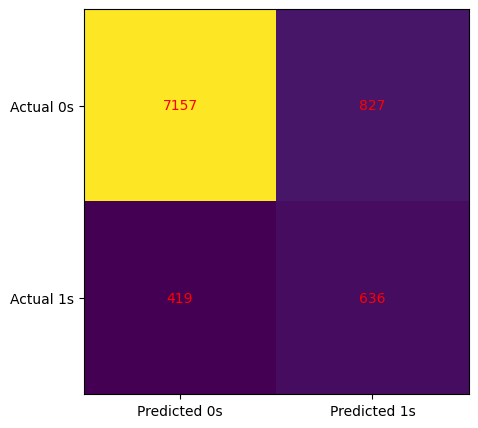

86.21528930191393

In [21]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeClassifer = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, splitter='best')

decisionTreeClassifer.fit(training_inputs, training_classes)

print(classification_report(testing_classes, decisionTreeClassifer.predict(testing_inputs)))

plot_confusion_matrix(testing_classes, decisionTreeClassifer.predict(testing_inputs))

decisionTreeClassifer.score(testing_inputs, testing_classes) * 100

#### Parameter tuning for Decision Tree
Again, we applied hyperparameter tuning to our model. We used GridSearchCV to search for the best hyperparameters for our model.

For Decision Tree, we tuned the following hyperparameters:
- max_depth: Maximum depth of the tree. We tested values from 1 to 100.
- min_samples_split: Minimum number of samples required to split an internal node. We tested values 1 and 2.
- min_samples_leaf: Minimum number of samples required to be at a leaf node. We tested values from 1 to 50.
- splitter: Strategy used to choose the split at each node. We tested 'best' and 'random'. We found that 'best' was the best strategy for our model.
- criterion: Function to measure the quality of a split. We tested 'gini', 'entropy' and 'log_loss'. We found that 'entropy' was the best criterion for our model.

In [96]:
from sklearn.model_selection import GridSearchCV

max_depth_range = [20]
min_samples_leaf_range = [1]
min_samples_split_range = [2]
splitter_range = ['best', 'random']
criterion_range = ['gini', 'entropy', 'log_loss']

param_grid = dict(
                max_depth=max_depth_range, 
                min_samples_leaf=min_samples_leaf_range, 
                min_samples_split=min_samples_split_range, 
                splitter=splitter_range,
                criterion=criterion_range
            )

# 10 fold cross validation
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10, n_jobs=-1, scoring=scoring, refit='f1', verbose=3)

grid.fit(training_inputs, training_classes)

grid.cv_results_

print(f'Best score: {grid.best_score_}')
print(f'Best params: {grid.best_params_}')

best_decision_tree_classifier = grid.best_estimator_

print(classification_report(testing_classes, best_decision_tree_classifier.predict(testing_inputs)))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score: 0.48325218651813584
Best params: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

          no       0.93      0.94      0.93      7984
         yes       0.49      0.48      0.49      1055

    accuracy                           0.88      9039
   macro avg       0.71      0.71      0.71      9039
weighted avg       0.88      0.88      0.88      9039



#### Random Forest
We then applied a Random Forest model to our data. This is an ensemble model that works by training multiple decision trees and averaging their predictions. It is a powerful model that can capture complex relationships in the data and reduce overfitting.

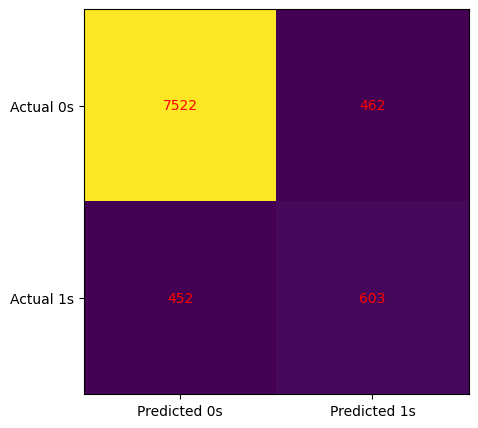

              precision    recall  f1-score   support

          no       0.94      0.94      0.94      7984
         yes       0.57      0.57      0.57      1055

    accuracy                           0.90      9039
   macro avg       0.75      0.76      0.76      9039
weighted avg       0.90      0.90      0.90      9039



89.88826197588229

In [22]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier = RandomForestClassifier(bootstrap=False, max_depth=35, n_estimators=400, random_state=42)

randomForestClassifier.fit(training_inputs, training_classes)

plot_confusion_matrix(testing_classes, randomForestClassifier.predict(testing_inputs))
print(classification_report(testing_classes, randomForestClassifier.predict(testing_inputs)))

randomForestClassifier.score(testing_inputs, testing_classes) * 100


#### Hyperparameter tuning for random forest
Again, we applied hyperparameter tuning to our model. We used GridSearchCV to search for the best hyperparameters for our model.

For Random Forest, we tuned the following hyperparameters:
- n_estimators: Number of trees in the forest. We tested values from 1 to 1000.
- max_features: Maximum number of features to consider when looking for the best split. We tested 'auto' and 'sqrt'.
- max_depth: Maximum depth of the tree. We tested values from 1 to 100.
- min_samples_split: Minimum number of samples required to split an internal node. We tested values 1 and 2.
- min_samples_leaf: Minimum number of samples required to be at a leaf node. We tested values from 1 to 20.
- bootstrap: Method used to sample data points. We tested 'True' and 'False'. We found that 'False' was the best method for our model.

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 400)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 110, num = 50)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]

n_estimators = [300, 400, 500]
max_features = ['sqrt']
max_depth = [30, 35, 40]
min_samples_split = [2]
min_samples_leaf = [1]
bootstrap = [True, False]
random_state = [42]

param_grid=dict(
    n_estimators=n_estimators,
    max_features=max_features,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    bootstrap=bootstrap
)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes')
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring=scoring, refit='accuracy')

grid_search.fit(training_inputs, training_classes)

print(f'Best: {grid_search.best_score_} using {grid_search.best_params_}')

best_random_forest_classifier = grid_search.best_estimator_

print(classification_report(testing_classes, best_random_forest_classifier.predict(testing_inputs)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best: 0.9047410058085166 using {'bootstrap': True, 'max_depth': 35, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7984
         yes       0.67      0.37      0.48      1055

    accuracy                           0.91      9039
   macro avg       0.80      0.67      0.71      9039
weighted avg       0.89      0.91      0.89      9039



In [99]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=35, n_estimators=400, random_state=42)

#### Support Vector Machine
For this algorithm, due to its complexity, we decided against doing a grid search for parameter tunning, and, instead, opted by tuning the parameters "by hand" to gain a better understanding of their impact.

So, let's first understand what each tested parameter means and their possible values:
1. kernel: kernel function used in the algorithm, that takes two inputs and outputs their similarity.
    - 'linear' will use a linear hyperplane as the decision boundary.
    - 'rbf' stands for Radial basis function and it determines the decision boundary based on the distance from the center of the data.
    - 'poly' stands for Polynomial and it creates decision boundaries based on polynomial combinations of the features.
2. C: regularization parameter that determines the trade off between achieving a low training error and a low testing error, that is the ability to generalize your classifier to unseen data. As the value of C increases, the model overfits the training data and as it decreases, the model underfits the data.
3. gamma:  Kernel coefficient that defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.
4. degree: represents the degree of the polynomial used to find the hyperplane to split the data.

Support Vector Machine, RBF Kernel, C=1, gamma=0.1


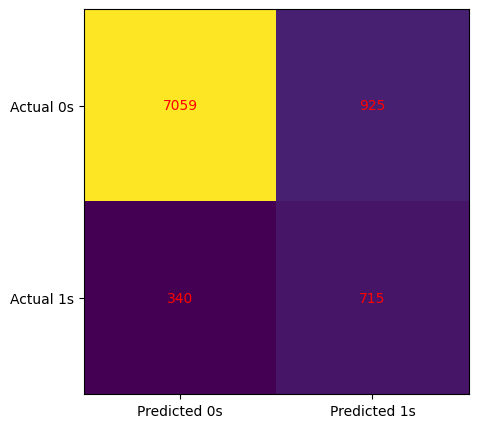

88.52708078814648
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      7984
           1       0.44      0.68      0.53      1055

    accuracy                           0.86      9039
   macro avg       0.70      0.78      0.72      9039
weighted avg       0.89      0.86      0.87      9039

Support Vector Machine, RBF Kernel, C=1, gamma=default (scale)


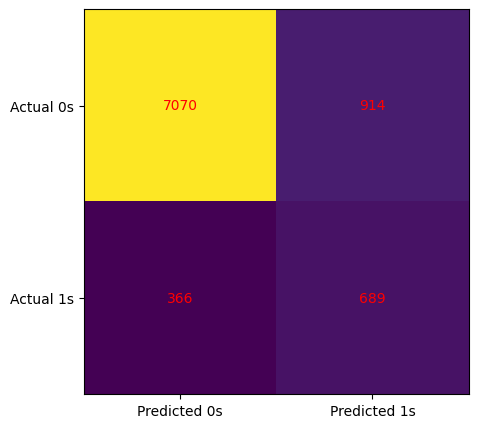

89.24756445196253
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7984
           1       0.43      0.65      0.52      1055

    accuracy                           0.86      9039
   macro avg       0.69      0.77      0.72      9039
weighted avg       0.89      0.86      0.87      9039

Support Vector Machine, RBF Kernel, C=100, gamma=0.1


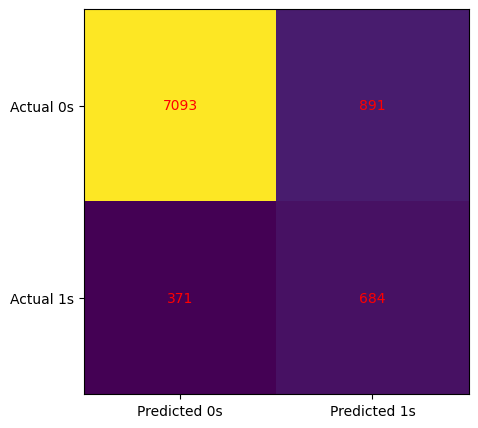

91.16781004291576
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7984
           1       0.43      0.65      0.52      1055

    accuracy                           0.86      9039
   macro avg       0.69      0.77      0.72      9039
weighted avg       0.89      0.86      0.87      9039

Support Vector Machine, linear Kernel, C=1


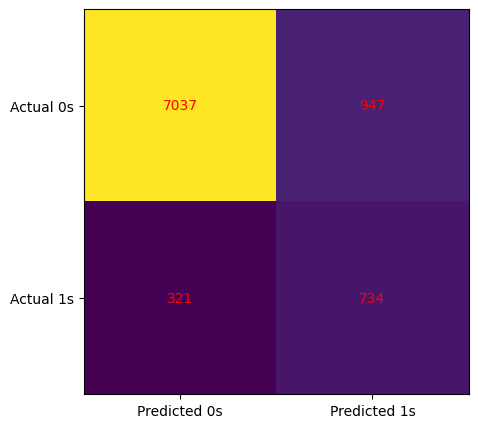

87.02502897597344
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7984
           1       0.44      0.70      0.54      1055

    accuracy                           0.86      9039
   macro avg       0.70      0.79      0.73      9039
weighted avg       0.90      0.86      0.87      9039

Support Vector Machine, Poly Kernel, degree=2


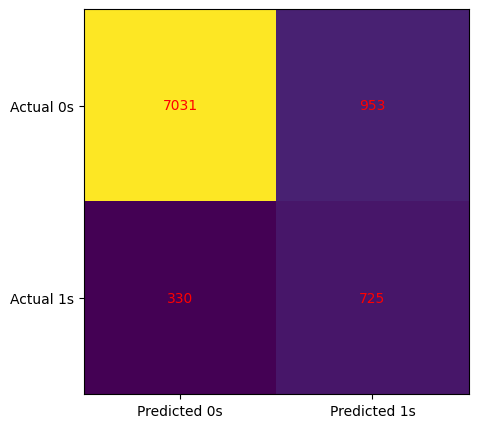

88.3798515177145
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7984
           1       0.43      0.69      0.53      1055

    accuracy                           0.86      9039
   macro avg       0.69      0.78      0.72      9039
weighted avg       0.89      0.86      0.87      9039

Support Vector Machine, Poly Kernel, degree=4


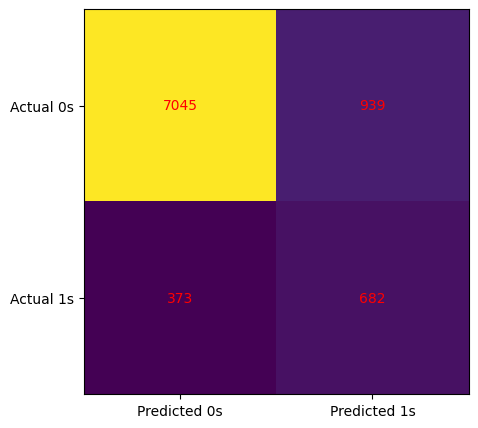

90.00720483663817
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7984
           1       0.42      0.65      0.51      1055

    accuracy                           0.85      9039
   macro avg       0.69      0.76      0.71      9039
weighted avg       0.89      0.85      0.87      9039



In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

mapping = {'yes': 1, 'no': 0}
training_classes = training_classes.map(mapping)
testing_classes = testing_classes.map(mapping)

print("Support Vector Machine, RBF Kernel, C=1, gamma=0.1")
svc = SVC(kernel='rbf', C=1, gamma=0.1, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs1 = svc.predict_proba(testing_inputs)[:, 1]
fpr1, tpr1, _ = roc_curve(testing_classes, probs1)
auc1 = auc(fpr1, tpr1)

print("Support Vector Machine, RBF Kernel, C=1, gamma=default (scale)")
svc = SVC(kernel='rbf', C=1, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs2 = svc.predict_proba(testing_inputs)[:, 1]
fpr2, tpr2, _ = roc_curve(testing_classes, probs2)
auc2 = auc(fpr2, tpr2)

print("Support Vector Machine, RBF Kernel, C=100, gamma=0.1")
svc = SVC(kernel='rbf', C=100, gamma=0.1, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs3 = svc.predict_proba(testing_inputs)[:, 1]
fpr3, tpr3, _ = roc_curve(testing_classes, probs3)
auc3 = auc(fpr3, tpr3)

print("Support Vector Machine, linear Kernel, C=1")
svc = SVC(kernel='linear', C=1, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs4 = svc.predict_proba(testing_inputs)[:, 1]
fpr4, tpr4, _ = roc_curve(testing_classes, probs4)
auc4 = auc(fpr4, tpr4)

print("Support Vector Machine, Poly Kernel, degree=2")
svc = SVC(kernel='poly', degree=2, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs5 = svc.predict_proba(testing_inputs)[:, 1]
fpr5, tpr5, _ = roc_curve(testing_classes, probs5)
auc5 = auc(fpr5, tpr5)

print("Support Vector Machine, Poly Kernel, degree=4")
svc = SVC(kernel='poly', degree=4, probability=True).fit(training_inputs,training_classes)
predictionsvm = svc.predict(testing_inputs)
plot_confusion_matrix(testing_classes, predictionsvm)
print(svc.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, predictionsvm))

probs6 = svc.predict_proba(testing_inputs)[:, 1]
fpr6, tpr6, _ = roc_curve(testing_classes, probs6)
auc6 = auc(fpr6, tpr6)

Let's now look at the chosen parameters:
1. RBF Kernel, C=1, gamma=0.1: This is a common starting point for SVMs. The RBF kernel is a good default choice of kernel, and C=1 and gamma=0.1 are moderate values that often work well in practice.
2. RBF Kernel, C=1, gamma=default (scale): This experiment is testing the effect of letting gamma be calculated automatically by sklearn (based on the data) instead of setting it manually.
3. RBF Kernel, C=100, gamma=0.1: This experiment is testing the effect of increasing the C parameter. A larger C means that the SVM will try harder to classify all points correctly, potentially at the expense of a simpler decision boundary.
4. Linear Kernel, C=1: This experiment is testing the effect of using a linear kernel instead of the RBF kernel. A linear kernel can be more appropriate if the data is linearly separable, or, in our case, since the dataset is very large.
5. Poly Kernel, degree=2: This experiment is testing the effect of using a polynomial kernel with degree 2. A polynomial kernel can model more complex relationships than a linear kernel, but is less flexible than the RBF kernel.
6. Poly Kernel, degree=4: This is testing the effect of a higher-degree polynomial kernel. A higher degree allows for even more complex relationships, but can also lead to overfitting.

Below, a ROC curve was plotted in order to analyze the performance of the different parameters:

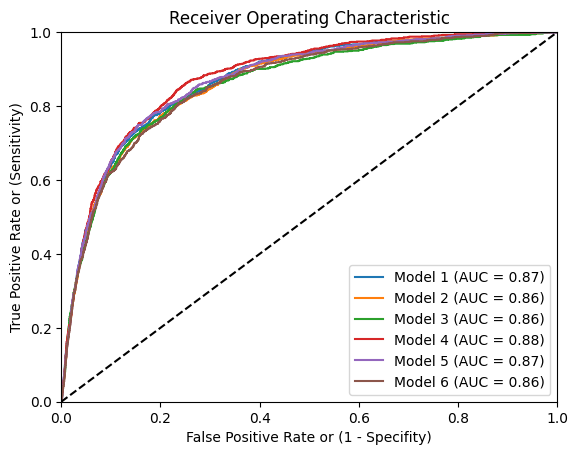

In [66]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr1, tpr1, label='Model 1 (AUC = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, label='Model 2 (AUC = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, label='Model 3 (AUC = %0.2f)' % auc3)
plt.plot(fpr4, tpr4, label='Model 4 (AUC = %0.2f)' % auc4)
plt.plot(fpr5, tpr5, label='Model 5 (AUC = %0.2f)' % auc5)
plt.plot(fpr6, tpr6, label='Model 6 (AUC = %0.2f)' % auc6)

plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

As we can see, there was little differences between the results with the different parameters, most likely due to the short parameter range. However, it is possible to atest that Model 4 performed the best, especially if you take into account the short time spent training the model.

With this in mind, `kernel='linear', C=1` will be considered the best parameters for this model.

Below is commented code for the gridsearch of this model for hyperparameter tuning. As explained, this took over 11 hours to run with very few parameters, so it provided very little insights. As such, we included the code, however, we didn't resort to it.

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Define the hyperparameters to be tuned
# param_grid = {
#     'C': [0.1, 1000],  
#     'gamma': [1, 0.0001], 
#     'kernel': ['rbf']
# }  

# # Initialize GridSearchCV with the SVC, the parameter grid, and other parameters
# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5, n_jobs=-1)

# # Fit the GridSearchCV object on the training data
# grid.fit(training_inputs, training_classes)

# # Print the best parameters and the score of the best estimator
# print("Best parameters: ", grid.best_params_)
# print("Best score: ", grid.best_score_)

# # Get the best estimator
# best_svc = grid.best_estimator_

# # Predict on the test data using the best estimator
# predictionsvm = best_svc.predict(testing_inputs)

# # Print the score of the best estimator on the training data
# print("Training score: ", best_svc.score(training_inputs, training_classes) * 100)

#### Neural Networks
The next model we trained was a Multi-Layer Perceptron classifier, aka a Neural Network.

The best parameters chosen were: 
- hidden_layer_sizes=(50,50): two hidden layers, each with 50 neurons
- activation="tanh": hyperbolic tangent function will be used as the activation function
- alpha=0.0001: L2 penalty (regularization term) parameter.
- learning_rate="adaptive": The learning rate will be kept constant as long as the training loss keeps decreasing. If it starts to increase, the learning rate will be decreased.
- solver="adam": The Adam optimizer will be used for weight optimization.
- random_state=1: seed for the random number generator, ensuring that the results are reproducible.
- max_iter=400: The solver will iterate a maximum of 400 times.

The mean accuracy of the model was ~95%.

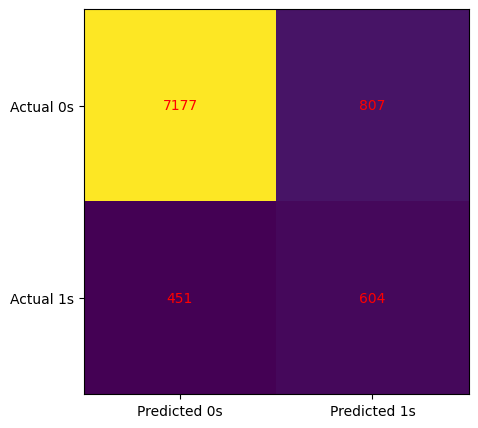

95.47035053096513
              precision    recall  f1-score   support

          no       0.94      0.90      0.92      7984
         yes       0.43      0.57      0.49      1055

    accuracy                           0.86      9039
   macro avg       0.68      0.74      0.70      9039
weighted avg       0.88      0.86      0.87      9039



In [24]:
clf = MLPClassifier(hidden_layer_sizes=(50,50),activation="tanh", alpha=0.0001, learning_rate="adaptive", solver="adam", random_state=1, max_iter=400).fit(training_inputs,training_classes)
neuralnetwork=clf.predict(testing_inputs)
plot_confusion_matrix(testing_classes, neuralnetwork)
print(clf.score(training_inputs,training_classes) * 100)
print(classification_report(testing_classes, neuralnetwork))

#### Hyperparameter tuning for Neural Network
We then, once again, used GridSearch from sklearn to perform hyperparameter tuning. 
The parameters to try are the following:
- hidden_layer_sizes: 32 neurons in each layer and 50 neurons in each layer.
- activation: tanh' and 'relu' are being tried.
- solver: 'sgd' (stochastic gradient descent) and 'adam' are being tried.
- alpha: L2 penalty (regularization term) parameter.
- learning_rate: 'constant' is a constant learning rate given by 'learning_rate_init'. 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing.

Besides this, precision, recall and F1-score are being used as scoring metrics.

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define the hyperparameters to be tuned
param_grid = {
    'hidden_layer_sizes': [(32,32), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

scoring = {
    'accuracy': 'accuracy', 
    'precision': make_scorer(precision_score, pos_label='yes'),
    'recall': make_scorer(recall_score, pos_label='yes'),
    'f1': make_scorer(f1_score, pos_label='yes')
}

# Initialize GridSearchCV with the MLPClassifier, the parameter grid, and other parameters
grid = GridSearchCV(MLPClassifier(max_iter=100), param_grid, refit='accuracy', verbose=3, cv=4, n_jobs=-1, scoring=scoring)

# Fit the GridSearchCV object on the training data
grid.fit(training_inputs, training_classes)

# Print the best parameters and the score of the best estimator
print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

# Get the best estimator
best_mlp = grid.best_estimator_

# Predict on the test data using the best estimator
predictionmlp = best_mlp.predict(testing_inputs)

# Print the score of the best estimator on the training data
print("Training score: ", best_mlp.score(training_inputs, training_classes) * 100)

Fitting 4 folds for each of 32 candidates, totalling 128 fits
Best parameters:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
Best score:  0.9013387831995802
Training score:  91.35088786856225


### Naive Bayes
We implemented the Naive Bayes model on our dataset. This model is a probabilistic classifier that uses Bayes' Theorem, a principle in probability theory that updates predictions based on new data. 

Naive Bayes is simple yet effective, making it a good fit for our dataset, which has multiple dimensions and a mix of categorical and numerical variables, although other models may be more powerful.

Training accuracy:  0.7353162296776619
              precision    recall  f1-score   support

          no       0.94      0.57      0.71      7984
         yes       0.19      0.73      0.30      1055

    accuracy                           0.59      9039
   macro avg       0.56      0.65      0.50      9039
weighted avg       0.85      0.59      0.66      9039



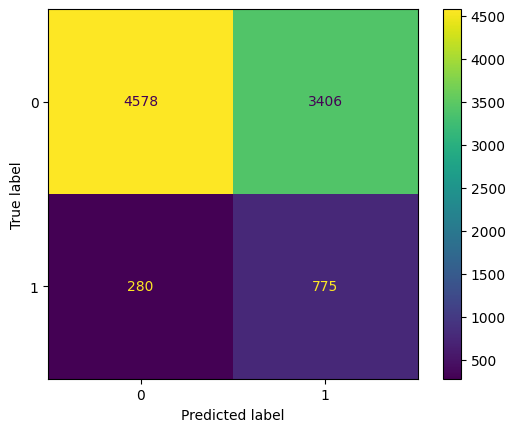

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

naiveBayes = GaussianNB()

naiveBayes.fit(training_inputs, training_classes)

print("Training accuracy: ", naiveBayes.score(training_inputs, training_classes))
print(classification_report(testing_classes, naiveBayes.predict(testing_inputs)))

t1 = ConfusionMatrixDisplay(confusion_matrix(testing_classes, naiveBayes.predict(testing_inputs)))
t1.plot()

#### Hyperparameter tuning for Naive Bayes
1. Tune var_smoothing

What it represents?
- var_smoothing: A portion of the largest variance of all features that is added to variances for calculation stability.

Steps:
- Step 1: Tune var_smoothing. We initially tuned var_smoothing with a range of values from 1e-9 to 1e-4. This parameter is used for handling features in the dataset that are not present in the training data to smooth the calculations.

Finally, after running the grid search we found optimal value of 1e-09 for var_smoothing.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best: 0.5282409617032441 using {'var_smoothing': 1e-09}


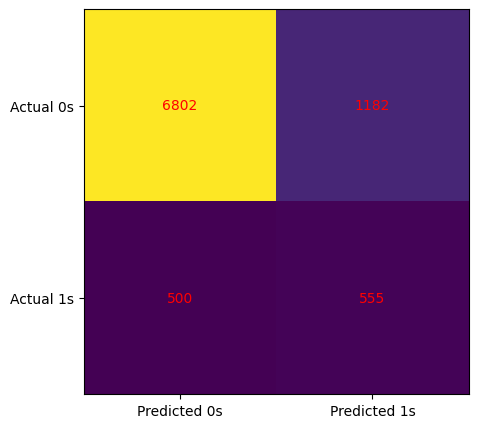

Accuracy: 81.39174687465427
              precision    recall  f1-score   support

          no       0.93      0.85      0.89      7984
         yes       0.32      0.53      0.40      1055

    accuracy                           0.81      9039
   macro avg       0.63      0.69      0.64      9039
weighted avg       0.86      0.81      0.83      9039



In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


nb_classifier = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]
}

scoring = {
    'precision':make_scorer(precision_score, pos_label = 'yes'),
    'recall':make_scorer(recall_score, pos_label = 'yes'),
    'f1_score':make_scorer(f1_score, pos_label = 'yes')
}

# Setup the grid search
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring=scoring, refit='recall')

# Fit the grid search
grid_search.fit(training_inputs, training_classes)

# Print the best parameters and the corresponding score
print(f'Best: {grid_search.best_score_} using {grid_search.best_params_}')

# Use the best estimator to make predictions and evaluate
best_nb_classifier = grid_search.best_estimator_
predicted_classes = best_nb_classifier.predict(testing_inputs)

# Plot confusion matrix
plot_confusion_matrix(testing_classes, predicted_classes)

# Print accuracy
accuracy = best_nb_classifier.score(testing_inputs, testing_classes) * 100
print("Accuracy:", accuracy)

# Print classification report
report = classification_report(testing_classes, predicted_classes)
print(report)

#### Gradient Boosting Classifier
This model is a powerful machine learning algorithm that incrementally builds an ensemble of decision trees, with each new tree aiming to correct the errors of the existing ensemble.

This model is particularly useful for our dataset as it can handle a variety of data types and structures, and it performs exceptionally well on complex datasets.

For instance, if our dataset contains a mix of numerical and categorical data, Gradient Boosting can manage this complexity.

It's also a preferred method when the dataset is relatively clean, with few outliers or missing values, and when high predictive accuracy is a priority, as is the case with our project.

Training accuracy:  0.9140275036807317
              precision    recall  f1-score   support

          no       0.96      0.90      0.93      7984
         yes       0.49      0.73      0.58      1055

    accuracy                           0.88      9039
   macro avg       0.72      0.81      0.76      9039
weighted avg       0.91      0.88      0.89      9039



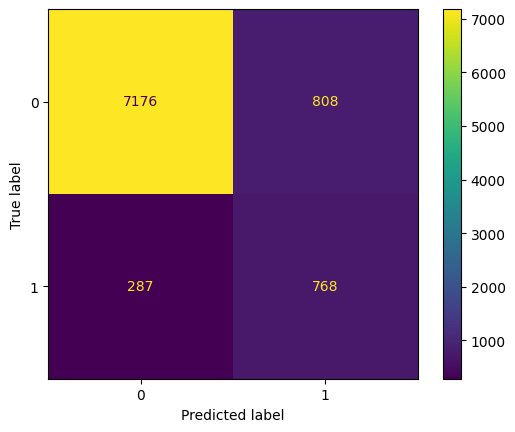

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

gradientBoosting = GradientBoostingClassifier(random_state=42)

gradientBoosting.fit(training_inputs, training_classes)

print("Training accuracy: ", gradientBoosting.score(training_inputs, training_classes))
print(classification_report(testing_classes, gradientBoosting.predict(testing_inputs)))

t1 = ConfusionMatrixDisplay(confusion_matrix(testing_classes, gradientBoosting.predict(testing_inputs)))
t1.plot()

#### Hyperparameter tuning for Gradient Boosting Machine

Tuning tree-specific parameters:
1. Tune max_depth and num_samples_split
2. Tune min_samples_leaf
3. Tune max_features

What they represent?
- min_samples_split: Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting
- min_samples_leaf: Defines the minimum samples (or observations) required in a terminal node or leaf.
- max_depth: The maximum depth of a tree.
- max_features: The number of features to consider while searching for a best split. These will be randomly selected.

Steps:
- Step 1: Tune max_depth and min_samples_split
We initially tuned max_depth from 5 to 25 with increments of 2 and min_samples_split from 200 to 10001 with increments of 200. We found that the optimal max_depth was at lower values, so we reduced the range to 5-18. The optimal min_samples_split was 200, so we refined the search to a range of 50-201 with increments of 50. Again, the lower bound proved optimal, leading us to further narrow the range to 10-51 with increments of 10.
- Step 2: Tune min_samples_leaf
We then searched for the optimal min_samples_leaf value between 30 and 91 with increments of 10 and identified 40 as optimal. To improve performance, we refined the search to 10-51 with increments of 10.
- Step 3: Tune max_features
Finally, we optimized max_features by searching within 7-30 with increments of 2 and found 7 to be optimal. We then narrowed the range to 2-9 with increments of 2, and 6 remained the optimal value.

With the main parameters tuned and their intervals reduced for faster execution, we performed a final grid search, resulting in the following optimal parameters:
- max_depth=15
- min_samples_split=10
- min_samples_leaf=40
- max_features=6

Fitting 5 folds for each of 560 candidates, totalling 2800 fits
Best: 0.4741141729536314 using {'max_depth': 13, 'max_features': 8, 'min_samples_leaf': 40, 'min_samples_split': 10, 'n_estimators': 60}
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7984
         yes       0.66      0.47      0.55      1055

    accuracy                           0.91      9039
   macro avg       0.80      0.72      0.75      9039
weighted avg       0.90      0.91      0.90      9039

Best score: 0.4741141729536314
Best params: {'max_depth': 13, 'max_features': 8, 'min_samples_leaf': 40, 'min_samples_split': 10, 'n_estimators': 60}


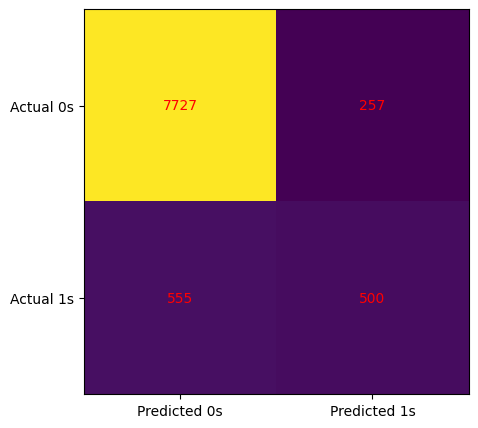

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

gb_classifier = GradientBoostingClassifier(random_state=42)

# Miscellaneous Parameters
n_estimators = [100, 150, 200, 250, 300]
learning_rate = [0.1, 0.05, 0.025]
subsample = [0.6,0.7,0.75,0.8,0.85,0.9,1]

# 1
#max_depth = range(5,25,2)
max_depth = range(5,18,2)

#min_samples_split = range(200,1001,200
#min_samples_split = range(50,201,50)
min_samples_split = range(10,51,10)

#2
#min_samples_leaf = range(30,91,10)
min_samples_leaf = range(30,61,10)

#3
#max_features = range(7,30,2)
max_features = range(2,9,2)

param_grid=dict(
    n_estimators=[60],
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf = min_samples_leaf,
    max_features = max_features
)

scoring = {
    'precision':make_scorer(precision_score, pos_label = 'yes'),
    'recall':make_scorer(recall_score, pos_label = 'yes'),
    'f1_score':make_scorer(f1_score, pos_label = 'yes')
}


grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=3, scoring=scoring, refit='recall')

grid_search.fit(training_inputs, training_classes)

print(f'Best: {grid_search.best_score_} using {grid_search.best_params_}')

best_gb_classifier = grid_search.best_estimator_

print(classification_report(testing_classes, best_gb_classifier.predict(testing_inputs)))

print(f'Best score: {grid_search.best_score_}')
print(f'Best params: {grid_search.best_params_}')

plot_confusion_matrix(testing_classes, best_gb_classifier.predict(testing_inputs))

After tree-specific parameters Tuning

              precision    recall  f1-score   support

          no       0.95      0.93      0.94      7984
         yes       0.55      0.65      0.59      1055

    accuracy                           0.90      9039
   macro avg       0.75      0.79      0.77      9039
weighted avg       0.91      0.90      0.90      9039



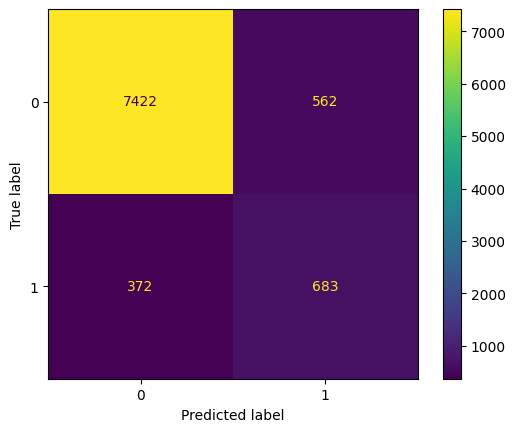

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report

gradientBoosting = GradientBoostingClassifier(random_state=42, max_depth=15, min_samples_split=10, n_estimators=60, min_samples_leaf=40, max_features=6)

gradientBoosting.fit(training_inputs, training_classes)

print(classification_report(testing_classes, gradientBoosting.predict(testing_inputs)))

t1 = ConfusionMatrixDisplay(confusion_matrix(testing_classes, gradientBoosting.predict(testing_inputs)))
t1.plot()

## Algorithms Comparison
Now that we've trained and tested all of our models, it is time to compare them in terms of performance. For that, we plotted a ROC curve graph.

We calculated the True Positive Rate and False Positive Rate for each model and used the ROC curve - a single number summary of the classifier performance - to understand which model is best.

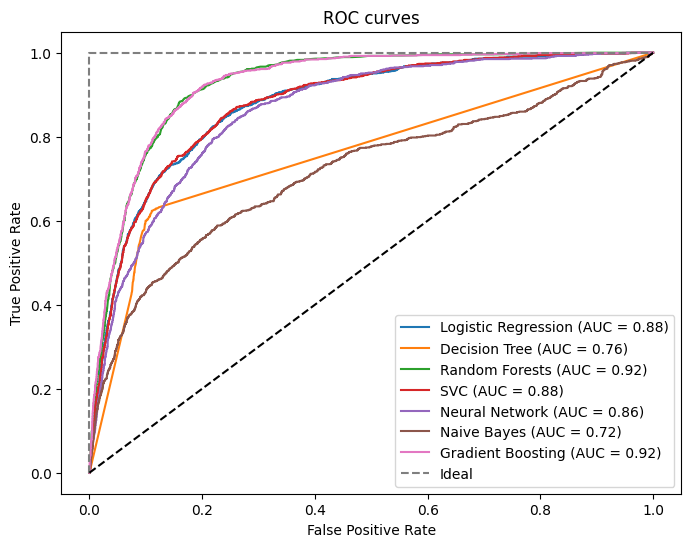

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression
lr_probs = logisticRegression.predict_proba(testing_inputs)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(testing_classes, lr_probs, pos_label='yes')
lr_auc = auc(lr_fpr, lr_tpr)

# Decision Tree
dt_probs = decisionTreeClassifer.predict_proba(testing_inputs)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(testing_classes, dt_probs, pos_label='yes')
dt_auc = auc(dt_fpr, dt_tpr)

# Random Forests
rf_probs = randomForestClassifier.predict_proba(testing_inputs)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(testing_classes, rf_probs, pos_label='yes')
rf_auc = auc(rf_fpr, rf_tpr)

# SVC
svc = SVC(kernel='linear', C=1, probability=True).fit(training_inputs,training_classes)
svc_probs = svc.predict_proba(testing_inputs)[:, 1]
svc_fpr, svc_tpr, _ = roc_curve(testing_classes, svc_probs, pos_label='yes')
svc_auc = auc(svc_fpr, svc_tpr)

# Neural Network
nn_probs = clf.predict_proba(testing_inputs)[:, 1]
nn_fpr, nn_tpr, _ = roc_curve(testing_classes, nn_probs, pos_label='yes')
nn_auc = auc(nn_fpr, nn_tpr)

# Naive Bayes
nb_probs = naiveBayes.predict_proba(testing_inputs)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(testing_classes, nb_probs, pos_label='yes')
nb_auc = auc(nb_fpr, nb_tpr)

# Gradient Boosting
gb_probs = gradientBoosting.predict_proba(testing_inputs)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(testing_classes, gb_probs, pos_label='yes')
gb_auc = auc(gb_fpr, gb_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Different models
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forests (AUC = {rf_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, label=f'SVC (AUC = {svc_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient Boosting (AUC = {gb_auc:.2f})')

# Ideal ROC curve
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='Ideal')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc='best')
plt.show()

Luckily, we could atest that we gathered extremely impressive results in all models. However, it is noticeable that the Gradient Boosting Classifier was the best by small margins.

Our real challenge, and the "make it or break it factor", was, in fact, the time spent to train/test the models and the time spent on parameter tunning.

In fact, since our dataset is very complete (more than 45 000 instances), running GridSearch as a form of hyperparameter tunning was not as effective as it could have been. Gridsearching with more than just a few parameters resulted in execution times of over 20 hours! Although we were able to find alternatives (reducing the range of parameters per iteration of the gridsearch), we believe that with a smaller dataset or more pwerful computers, we would have been able to further optimize our models.

Despite this challenge, like said, we are very happy with the results obtained, and selected the Gradient Boosting Model as the best, not only for its performance, but also for its reasonable training and testing time (~5 seconds).


## Comparison between scaled and unscaled data:
Additionally, and as part of our conclusions, we wanted to understand the impact of scaling our data. For that, we decided to train and test the same model (Gradient Boost) on scalled and unscaled data, and analyze the results:

Without normalization:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7984
         yes       0.60      0.50      0.54      1055

    accuracy                           0.90      9039
   macro avg       0.77      0.73      0.74      9039
weighted avg       0.90      0.90      0.90      9039

With normalization:
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      7984
         yes       0.55      0.65      0.59      1055

    accuracy                           0.90      9039
   macro avg       0.75      0.79      0.77      9039
weighted avg       0.91      0.90      0.90      9039



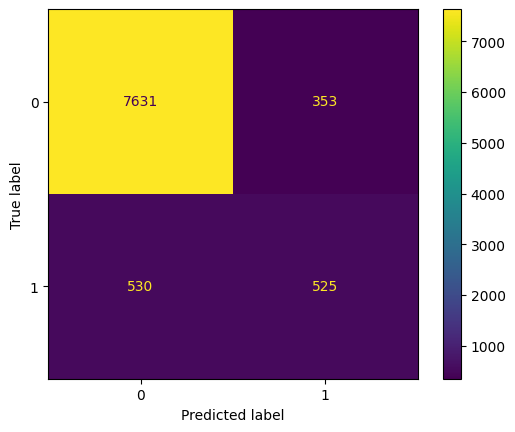

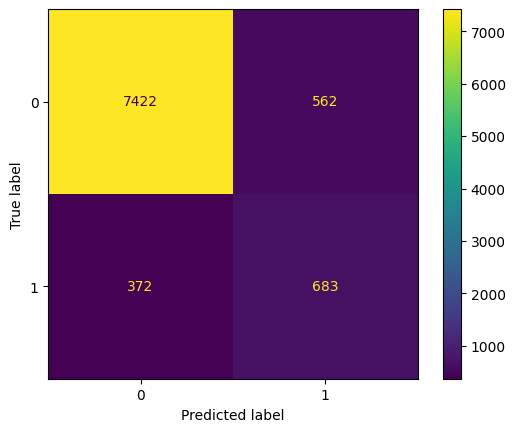

In [29]:
# Comparison with and without normalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Split and resample the data
(training_inputs_no_norm,
    testing_inputs_no_norm,
    training_classes_no_norm,
    testing_classes_no_norm) = train_test_split(inputs_encoded_before_scaling, labels, test_size=0.20, random_state=42)

# SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
training_inputs_no_norm, training_classes_no_norm = sm.fit_resample(training_inputs_no_norm, training_classes_no_norm)

# Gradient Boosting
gradientBoosting_no_norm = GradientBoostingClassifier(random_state=42, max_depth=15, min_samples_split=10, n_estimators=60, min_samples_leaf=40, max_features=6)

gradientBoosting_no_norm.fit(training_inputs_no_norm, training_classes_no_norm)

print("Without normalization:")
print(classification_report(testing_classes_no_norm, gradientBoosting_no_norm.predict(testing_inputs_no_norm)))
ConfusionMatrixDisplay(confusion_matrix(testing_classes_no_norm, gradientBoosting_no_norm.predict(testing_inputs_no_norm))).plot()

# Gradient Boosting
gradientBoosting = GradientBoostingClassifier(random_state=42, max_depth=15, min_samples_split=10, n_estimators=60, min_samples_leaf=40, max_features=6)

gradientBoosting.fit(training_inputs, training_classes)

print("With normalization:")
print(classification_report(testing_classes, gradientBoosting.predict(testing_inputs)))
ConfusionMatrixDisplay(confusion_matrix(testing_classes, gradientBoosting.predict(testing_inputs))).plot()
 

NOTE: Top matrix - without normalization; Bottom matrix - With normalization

Although, in all honesty, we were expecting a bigger difference between the results, there is still a noticeable increase in the quality of the results when you normalize your data.

Data normalization is most important for models that depend on distance metrics for their calculations, which isn't the case with Gradient Boosting. That is probably why we didn't see a huge difference.

## Comparison between sampled and unsampled data
Similarly, we tried to understand the impact of sampling our data (using SMOTE technique) on the performance of our algorithm. For that, again, we trained the best model (Gradient Boost) with our dataset before resampling it and after. This time the results were more dramatic:

With resampling (SMOTE):
              precision    recall  f1-score   support

          no       0.95      0.93      0.94      7984
         yes       0.55      0.65      0.59      1055

    accuracy                           0.90      9039
   macro avg       0.75      0.79      0.77      9039
weighted avg       0.91      0.90      0.90      9039

Without resampling:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7984
         yes       0.66      0.47      0.55      1055

    accuracy                           0.91      9039
   macro avg       0.80      0.72      0.75      9039
weighted avg       0.90      0.91      0.90      9039

y
no     31923
yes     4231
Name: count, dtype: int64
y
no     31923
yes    31923
Name: count, dtype: int64


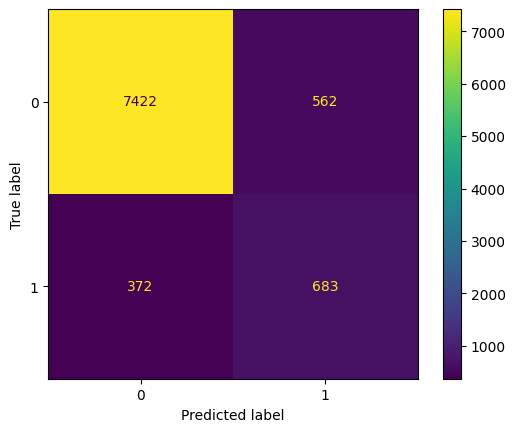

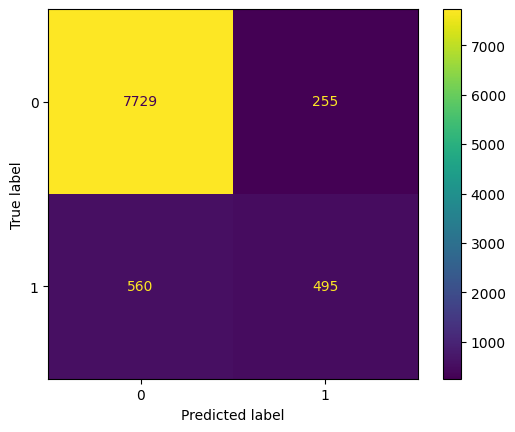

In [30]:
# Comparison with and without resampling

# With resampling
gradientBoosting = GradientBoostingClassifier(random_state=42, max_depth=15, min_samples_split=10, n_estimators=60, min_samples_leaf=40, max_features=6)

gradientBoosting.fit(training_inputs, training_classes)

print("With resampling (SMOTE):")
print(classification_report(testing_classes, gradientBoosting.predict(testing_inputs)))
print(ConfusionMatrixDisplay(confusion_matrix(testing_classes, gradientBoosting.predict(testing_inputs))).plot())

# Without resampling
gradientBoosting_no_resampling = GradientBoostingClassifier(random_state=42, max_depth=15, min_samples_split=10, n_estimators=60, min_samples_leaf=40, max_features=6)

gradientBoosting_no_resampling.fit(training_inputs_before_sampling, training_classes_before_sampling)

print("Without resampling:")
print(classification_report(testing_classes_before_sampling, gradientBoosting_no_resampling.predict(testing_inputs_before_sampling)))
print(ConfusionMatrixDisplay(confusion_matrix(testing_classes_before_sampling, gradientBoosting_no_resampling.predict(testing_inputs_before_sampling))).plot())

print(training_classes_before_sampling.value_counts())
print(training_classes.value_counts())

As we can see, by balancing our dataset using SMOTE, we were able to increase the performance of our model by a significant margin. This is due to the fact that most machine learning algorithms work best when the number of instances of each class are roughly equal.

This way, despite taking longer to train, the predictions made by the model were more on point, because there is less bias towards the "majority class".

### Conclusion
To conclude, with this analysis, we were able to understand the impact of different preprocessing techniques on the performance of our models. We were able to understand the importance of scaling and sampling our data, and how these techniques can improve the performance of our models.

Given this we were able to compare and identify the best model for our dataset, which was the Gradient Boosting Classifier. This model was able to achieve the best performance in terms of the ROC curve.

Although we faced some challenges with the execution time of our models, we were able to overcome them and obtain impressive results. We believe that with more time and resources, we could further optimize our models and achieve even better results.

